# Garbage Classification using Convolutional Neural Networks for better waste management and reusability. 🚀🔥

Github Reference: https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

In [3]:
import tensorflow as tf
import os

In [2]:
tf.config.list_physical_devices('GPU')

[]

#### Removing the improper images.

In [ ]:
import cv2
import imghdr

In [ ]:
# getting the dataset directory
data_dir = 'D://DS-ML//Notebooks and Practice//Garbage classification//dataset'

In [ ]:
# setting the acceptable image extensions

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 362 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[1]

array([2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

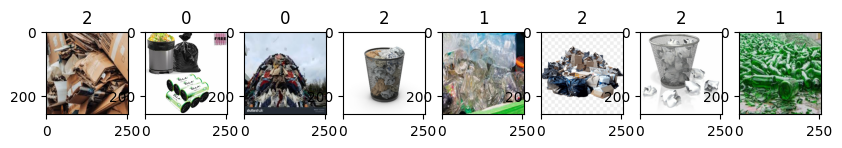

In [ ]:
# verify the class number for our image classes
fig, ax = plt.subplots(ncols=8, figsize=(10,10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### **Preprocessing data**


#### Scale the data so that it is in the range: 0 to 1 rather than 0 to 255

In [ ]:

# NOTE: Do **NOT** run this cell twice as it will map the data twice resulting in unwanted changes in data
# if ran twice re-run the cell number 18 and then re-run this cell

data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

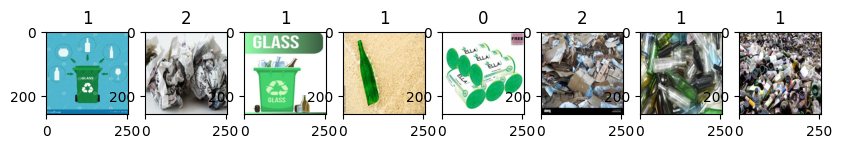

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(10,10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### **Split data**

In [ ]:
len(data)

12

In [ ]:
# splitting the dataset into trian test and validation

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
val_size, train_size, test_size

(2, 8, 2)

In [ ]:
# here take defines how much data we are going to take in that partition
# take also defines how many batches we want to allocate on the training data. NOTE: always shuffle data before using
# using skinp we are skipping the batches we have already allocated to the previous partition and take the last batch
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train), len(val), len(test)

(8, 2, 2)

## Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Reshape

In [ ]:
model = Sequential()

In [ ]:
# here 16 is the number of filters which will be 3x3 pixels and have a stride of 1
# relu activation function converts any negative values to 0 and all positive values remain unchanged
# in max pooling we just take the maximum value of previous operation and return it to the next layer
model = Sequential()

# Add layers
model.add(Dense(256, activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))


In [ ]:
# adam is the optimizer

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256, 256, 256)     1024      
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      36880     
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)           

In [ ]:
logdir = '/content/drive/My Drive/dataset/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 282s 35s/step - loss: -21.2161 - accuracy: 0.3242 - val_loss: -27.4266 - val_accuracy: 0.3125
Epoch 2/20
8/8 [==============================] - 275s 34s/step - loss: -199.3847 - accuracy: 0.3438 - val_loss: -158.4912 - val_accuracy: 0.3438
Epoch 3/20
8/8 [==============================] - 303s 38s/step - loss: -1239.2007 - accuracy: 0.3516 - val_loss: -1786.9525 - val_accuracy: 0.3438
Epoch 4/20
8/8 [==============================] - 279s 35s/step - loss: -5363.7202 - accuracy: 0.3164 - val_loss: -6834.9385 - val_accuracy: 0.3438
Epoch 5/20
8/8 [==============================] - 280s 35s/step - loss: -9956.6582 - accuracy: 0.3633 - val_loss: -22937.1777 - val_accuracy: 0.2969
Epoch 6/20
8/8 [==============================] - 275s 34s/step - loss: -10189.6270 - accuracy: 0.3242 - val_loss: -38147.9062 - val_accuracy: 0.2188
Epoch 7/20
8/8 [==============================] - 287s 36s/step - loss: -60972.3438 - accuracy: 0.3359 - val_loss: 